# Shark Attack Project - Team 1

-------

## 1. Introduction

The objective of this project is to analyze the data from the shark attack dataset and to prove these hypotheses:

1. The US has more shark attacks than other countries.
2. Mork Shark attacks in the US happen during the summer season.
3. In the US, the White shark is the most dangerous species. 

## 2. Collect the Data

First of all, we need to import the pandas and numpy library in order to use the functions and methods in Python. We also need to import matplotlib.pyplot library in order to create visualization in Python, such as plots and charts. 

We need then to call the dataset which we get from this website: 
https://www.sharkattackfile.net/incidentlog.htm

The data is in an Excel file, therefore, we need to use one of functions in the pandas library to read the Excel file by using read_excel method. The data then will be read in Python as a DataFrame.
In order to use the data from the original DataFrame without changing anything, we need to use .copy() method. This method will create a copy of the original DataFrame. Thus, the data cleaning and manipulation that we will do for the analysis will not influence the original DataFrame. 

### Data

The dataset used in this project is the Global Shark Attack File, which contains information about shark attacks from 1900 to 2016. The dataset has several columns, which consist of:

- Date - date when the injury recorded.
- Year - year of injury happened.
- Type - type of incidents.
- Country - country where the injury happened.
- State - state where the injury happened.
- Location - location where the injury happened. 
- Activity - activity that the victim did when the injury happened.
- Name - name of the victim.
- Sex - gender of the victim.
- Age - age of the victim.
- Injury - type of injury.
- Time - time when the injury happened.
- Species - species of the shark which attacked the victim.
- Source - source of information of the shark attack.
- Some unknowns - unknowns columns which exist from the data source.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import functions as fn

In [2]:
# load the data into data frame
url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"
df = fn.load_data(url)

## 3. Clean the data

In this section, we would like to explain about the data cleaning process.

### 3.1. Identify the Data

We need to understand the DataFrame by viewing the first three rows of our DataFrame. We can do this by using .head() method. After that, we check the number of rows and columns in the DataFrame using .shape method. The first output of this method indicates the number of rows and the second output shows the number of columns.

Furthermore, we use .columns method to understand all columns name in the DataFrame. This will help us to see the format of the column names and correct them if necessary.

In [3]:
# get first impression of dataset
fn.get_first_impression(df,n=3)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# check number of rows and columns
fn.get_shape(df)

(6969, 23)

In [5]:
# check column names
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

### 3.2. Clean the data

After identifying the data, we notice that column name 'Species ' has a whitespace on the right side of the name, we want to remove the whitespice with .rename method. Here we rename it into 'Species'.

We then decide to select and retain only specific columns for our analysis which we believe will be useful to answer our research questions. We reassign DataFrame `df` to include only columns specified in the list and the rest of the columns will be discarded. 

#### Removing missing values

In this step, we want to remove rows from the DataFrame that contain only missing values (NaNs) with .dropna method. 'how='all'' is used to specified that only rows in all columns are NaN would be dropped.
After dropping the missing values, we then check the number of rows after performing this method with .shape method which gives us insight on the number of rows and columns of the current DataFrame.

Furthermore, we want to remove missing values (NaNs) from the Year column. So, we use again the .dropna method and subset Year for this method. 
After that, since we notice that the the variables in Year column is a float type, we convert it into integer type with .astype method. To ensure that the methods assigned properly into our DataFrame, we take a brief view of the DataFrame with .head method.

In [6]:
# remove whitespace behind column name for species
df = fn.clean_column_names(df)

In [7]:
# choose certain variables that we are of interest for our problem statement
df = fn.select_columns(df, ["Date", "Year", "Country", "Species"])

In [8]:
# drop all rows where all columns are NaN
df = fn.drop_all_nan_rows(df)

In [9]:
# drop all rows where 'Year' is NaN
df = fn.drop_nan_year(df)

In [10]:
# correct the way the Years are written [from string to integer]
df = fn.correct_year_format(df)

#### Taking the past 10 years data

In order to confirm our first hypothesis that USA has more shark attacks than other countries, we decide that we will use the data of the past 10 years. 

First, we filter our Year column to be equal and more than 2015. We check the filtered year and count the data on each year with .value_counts method. We decide 

Then, we want to see the amount of Shark attack in top five countries in the world. We do that by using .value_counts method and assigning the first five data. For the rest of the data, we store them in 'others' variable. 

Lastly, we visualize the analysis of Shark attack in the past 10 years in the worlds into a pie chart with .plot.pie method. The data will be shown in the chart in percentage, therefore, we use autopct parameter to format the labels.

It proved the hypothesis that the US has more shark attacks than other countries.

In [11]:
# only consider last 10 years
df = fn.filter_last_10_years(df)

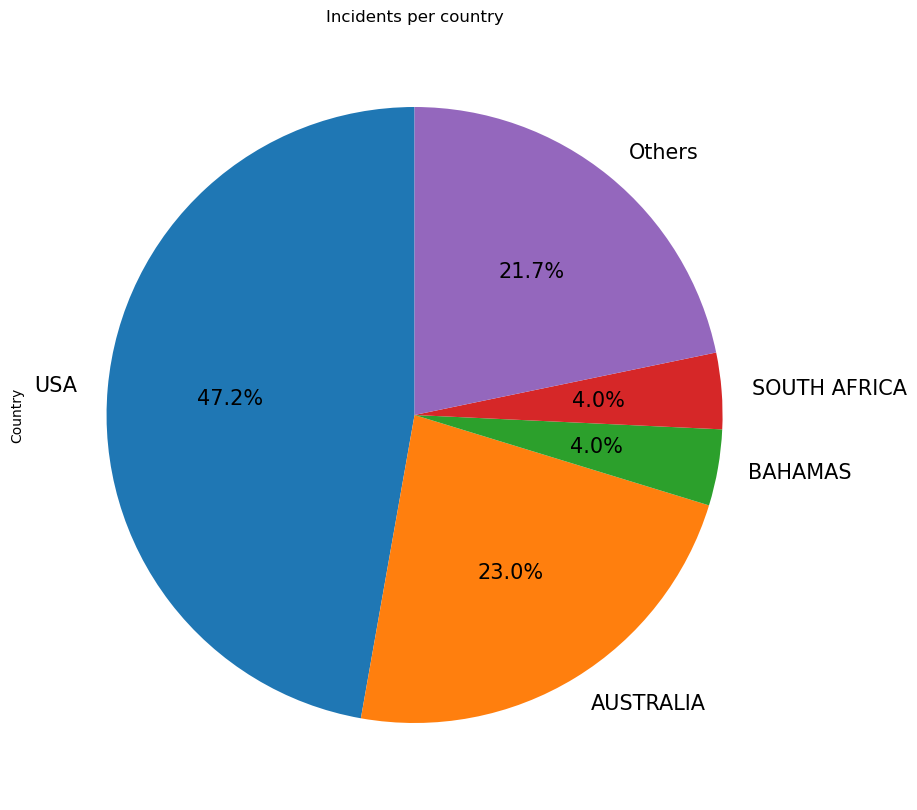

In [12]:
#Make a piechart of the top 4 countries with the most incidents, and a fifth slice representing the rest
fn.plot_top_countries_pie_chart(df)

In [13]:
#Only consider incidents in USA
df_usa = fn.filter_incidents_usa(df)

#### Formating the Date column

In order to understand whether more shark atacks in the US happen during the summer season, we need to be able to see the month when the attack happens. In this case, we decide to take the month from the Date column. 

We first need to create a new dataframe that focuses only on shark attack in the US with .loc attributes.

After that, we use regular expressions to search and match the pattern that we want to find. In this case, we use to removes all whitespaces, commas, and hyphens from the date. We also use .apply method to apply the lambda function into Date column. 

Since the parameters in Date column is in string type, we need to convert it into datetime with .to_datetime method. We also use `errors='coerce'` parameter to handle errors that may arrise. In addition, we reset the index as well to avoid any misunderstanding.

In [14]:
df_usa = fn.format_date_column(df_usa)
df_usa.head(3)

,Date,Year,Country,Species
0,2024-03-04,2024,USA,Tiger shark 8'
1,2024-03-02,2024,USA,3' to 4' shark
2,2023-12-30,2023,USA,NaN


#### Grouping the month into its season

After we get the month of the incidents, we group it into four seasons (Winter, Spring, Summer, and Fall) and if there is missing value, we will group it as Unknown just to understand its existence. We will drop the missing values in the end. 

We then check how many incidents happen in every season by using .sum method. In addition, we visualize this finding into a bar chart and use .patch to add label on top of the bar chart. This finding shows us that the shark attacks happen the most in summer, which proves our hypothesis.

In [15]:
#Add Season Column and create group by season and year
df_usa = fn.add_season_column(df_usa)
grouped_season = fn.group_by_season_year(df_usa)

In [16]:
def get_season(Date):
    if pd.isna(Date):
        return 'Unknown'
    month = pd.to_datetime(Date).month #Convert Date to datetime object and extract the month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df_usa['Season'] = df_usa['Date'].apply(get_season)

df_usa.head(3)


,Date,Year,Country,Species,Season
0,2024-03-04,2024,USA,Tiger shark 8',Spring
1,2024-03-02,2024,USA,3' to 4' shark,Spring
2,2023-12-30,2023,USA,NaN,Winter


In [17]:
#Add Season Column
df_usa = fn.add_season_column(df_usa)
df_usa.head(3)

,Date,Year,Country,Species,Season
0,2024-03-04,2024,USA,Tiger shark 8',Spring
1,2024-03-02,2024,USA,3' to 4' shark,Spring
2,2023-12-30,2023,USA,NaN,Winter


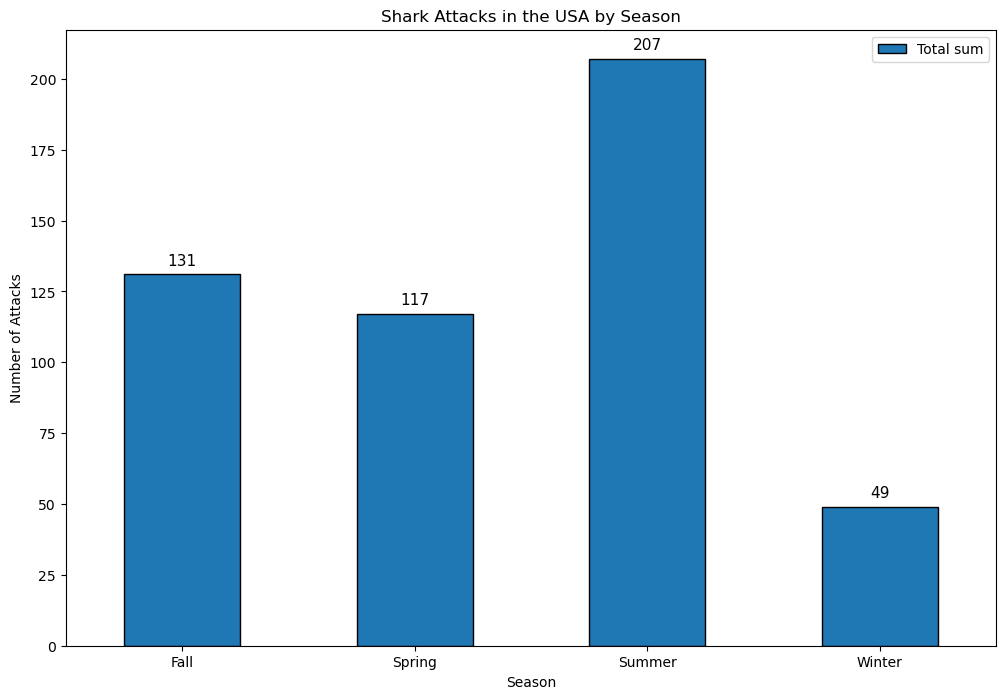

In [18]:
fn.plot_incidents_by_season(grouped_season)

#### Standardizing shark species' names

We now want to analyse the most dangerous shark species in the US. However, we realize that we first need to normalize all data in the Species column into lowercase, so, we use .lower() method and assign the name of specific species. Moreover, if there is missing value, we will specify them as "Not Specified". For non-string type data, we will call them as "Others". After that, we check the data in each species by using .value_counts() method. 
Finally, we visualize the data in a bar chart using seaborn library. As can be seen from the figure, white shark proves to be the most dangerous shark in the US confirming our hypothesis. 

In [19]:
# Standardize Species Names
df_usa = fn.standardize_species_names(df_usa)

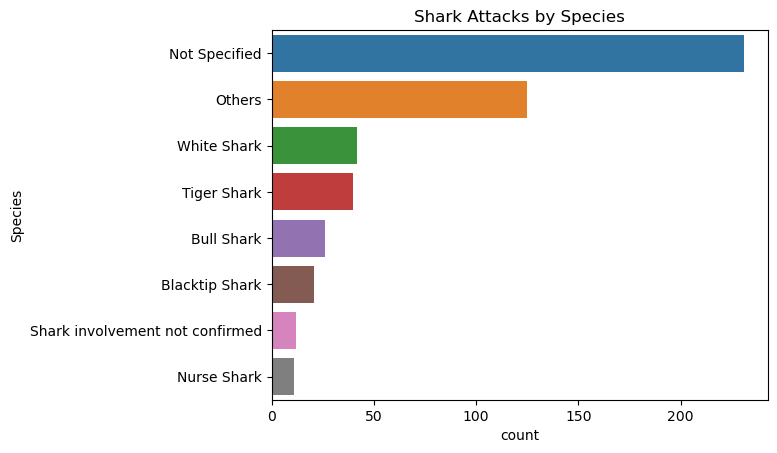

In [20]:
#Plot Shark Attacks by Species
fn.plot_shark_attacks_by_species(df_usa)

In [21]:
# Final check of the data frame
fn.final_data_check(df_usa)

        Date  Year Country        Species  Season
0 2024-03-04  2024     USA    Tiger Shark  Spring
1 2024-03-02  2024     USA         Others  Spring
2 2023-12-30  2023     USA  Not Specified  Winter
3 2023-11-05  2023     USA  Not Specified    Fall
4 2023-10-25  2023     USA    Tiger Shark    Fall
Not Specified                      231
Others                             125
White Shark                         42
Tiger Shark                         40
Bull Shark                          26
Blacktip Shark                      21
Shark involvement not confirmed     12
Nurse Shark                         11
Name: Species, dtype: int64
0
Not Specified                      231
Others                             125
White Shark                         42
Tiger Shark                         40
Bull Shark                          26
Blacktip Shark                      21
Shark involvement not confirmed     12
Nurse Shark                         11
Name: Species, dtype: int64


## 4. Conclusions

The analysis on the shark attack data has proved our hypotheses that the US has more shark attacks than other countries and the attacks happen the most in summer. Furthermore, it is proven that White shark is the most dangerous species in the US.